In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit import transpile

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy


# Load local account information
IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
# Get the least busy backend
#provider = IBMQ.get_provider(hub='ibm-q')
provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub=

In [3]:
remote_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))

print("El computador cuántico menos ocupado es el " + remote_backend.name())

#backend = provider.get_backend('ibmq_armonk')

El computador cuántico menos ocupado es el ibm_perth


In [4]:
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')

In [5]:
def withoutDelay():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[0])
    circuit.measure(q[0],c[0]) #Measuring the qubit

    nShots = 8192

    job = execute(circuit, remote_backend, shots=nShots)
    job_monitor(job)

    counts = job.result().get_counts()

    print("No delay: ",counts)
    plot_histogram(job.result().get_counts())
    
    return circuit

In [6]:
def withDelay():  
    circuit = QuantumCircuit(q,c)
    circuit.x(q[0])
    circuit.delay(200, unit="us") # Amplitude Damping of 118.82 us microseconds      
    circuit.measure(q[0],c[0]) #Measuring the qubit

    transpiled_circ = transpile(circuit, remote_backend, scheduling_method='alap')  

    nShots = 8192
    
    job = execute(transpiled_circ, remote_backend, shots=nShots)
    job_monitor(job)

    counts = job.result().get_counts()

    print("With delay: ",counts)
    plot_histogram(job.result().get_counts())
    
    return circuit

In [7]:
circuit=withoutDelay()

Job Status: job has successfully run
No delay:  {'0': 898, '1': 7294}


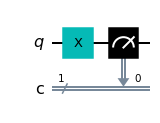

In [8]:
circuit.draw()

In [9]:
circuit_delay=withDelay()

Job Status: job has successfully run
With delay:  {'0': 6085, '1': 2107}


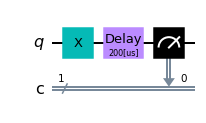

In [10]:
circuit_delay.draw()

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright